# CM3015 Machine Learning and Neural Networks (CW2)

## 1. Introduction

The machine learning problem(s) explored in this report will be following <i><a href='https://bookdown.org/paul/2021_computational_social_science/the-universal-workflow-of-machine-learning.html'>Chollet's universal workflow of machine learning</a></i> from Deep Learning with Python (Chp 4.5)

## 2. Defining the problem and assembling a dataset

The problem we will be looking at in this report will be <b>multiclass image classification</b> using Tensorflow's <a href="https://www.tensorflow.org/datasets/catalog/mnist">MNIST Digits dataset</a>. With the context of MNIST Digits, this means the correct classification of an input image into 1 of 10 possible outputs, being the digits 0 - 9.

An issue we have to take note of is nonstationary problems, where a machine learning model can only memorize patterns found in the training data. For example, if a model was created to evaluate the amount of snowfall in Winter, it would not really work if it was evaluated using test data taken the following Spring. However, in the case of MNIST Digits, it is a stationary problem and thus won't be affected.

### 2.1 Hypotheses
Given my current understanding of MNIST and the ways it can be classified, I hypothesize that it should be possible to predict the output using a given input as i believe that there exists a predictive relationship between the pixel values of a an input image and its corresponding input label.

Another hypothesis that can be made at this stage would be that the data provided by Tensorflow will be enough provide sufficient information to learn the relationship between the inputs and outputs.

## 3. Choosing a measure of success

Given that the MNIST dataset is provided by Tensorflow with a size of 60 thousand training images and 10 thousand testing images. Each class posseses an approximate amount of 6000 : 1000 images each.

As there is no class imbalance in this case, Accuracy will be the main evaluation metric used, with precision and recall, while still important, better reserved for problems where class imbalance is in play.

## 4. Deciding on an evaluation protocol

Hold-out validation will be performed in order to help assess the performance of the model during the training process without using the testing data set. The hold-out validation set is a subset of the training data that isn't used in training, but instead reserved for evaluating performance during training epochs.

Maintaining a hold-out validation set in machine learning is a common practice to assess the performance of a model during training without using the test set. The hold-out validation set is a subset of the training data that is not used for training the model but is reserved for evaluating its performance during training epochs. This allows you to monitor how well the model generalizes to new, unseen data and helps prevent overfitting.

## 5. Preparing your data

### 5.1 Loading of MNIST Dataset

In [1]:
!pip install tensorflow-datasets -q

In [2]:
!pip install tensorflow -q

In [3]:
!pip install opencv-python

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter
import cv2

# This allows us to reproduce the results from our script
tf.random.set_seed(42)
np.random.seed(42)

C:\Users\Owen\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### 5.2 MNIST Data Sample

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


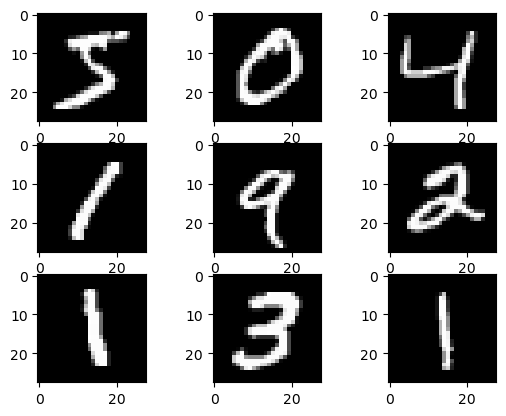

In [5]:
# Load MNIST Dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Dataset Summary
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

# Sample plot showing images in a (28, 28) 2d array
for i in range(9):
 plt.subplot(330 + 1 + i)
 plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))

plt.show()

### 5.2 Normalization

During training and evaluation of neural network models, pixel values in images must be normalized before being used as inputs. As the pixel values for each image are ranging between 0 to 255, I have since scaled them to 0 to 1.

In [6]:
# normalise pixels from [0, 255] to [0, 1]
X_train, X_test = X_train/255, X_test/255

### 5.3 One-Hot Encoding

One-hot encoding is another technique useful for dealing with the MNIST dataset as it helps represent categorical variables as binary vectors.

As we know that there are 10 digits found in MNIST and each are represented as the integers 0 - 9, one hot encoding can be used to transform each integer into a 10 element binary vector with 1 as its class value and 0 for other classes.

This can be achieved with TensorFlow's [to_categorical()](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical) utility function.

In [7]:
# one hot encoded target values
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

### 5.4 Hold-Out Set

As mentioned, a subset of the training data will be created in order to help evaluate its accuracy during the training oeriod.

In [8]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X_train, y_train_one_hot, test_size=0.2, random_state=42)

## 6. Developing a model that does better than a baseline

According to Chollet's DLWP, the baseline we have to beat when it comes to image classification with the MNIST dataset, we have to achieve an accuracy greater than 10% with our neural network model.

In addition to this, a last-layer, loss function and optimizer have to be chosen, given our problem and dataset, it would be classed as a Multiclass, single-label classification.

In this case, ***softmax*** will be used for last-layer activation and ***categorical_crossentropy*** will be the loss function.

In the case of an optimizer, the default ***rmsprop*** and its learning rate will be adopted.

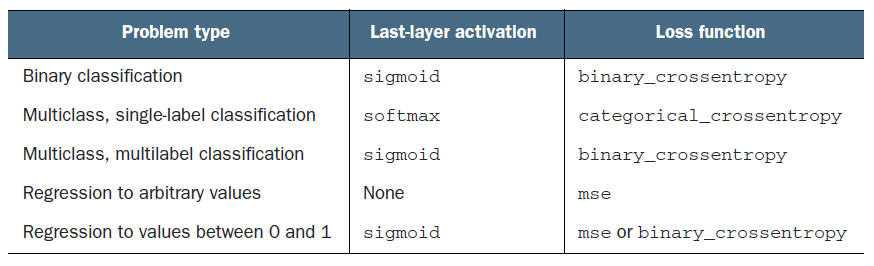



### 6.1 Naive Baseline

A Naive Majority Class Baseline will be created before a model is developed for it. The majority class baseline predicts that the majority class amongst all other instances will be the correct prediction in a classification problem. For example, if the digit 3 had the most classes of samples in the training set, the model will predict 3 for all instances.

In [9]:
# Convert one-hot encoded labels back to int labels
y_train_labels = np.argmax(y_train, axis=1)

# Count the number of samples for each label in the training set
highest_label = Counter(y_train_labels).most_common(1)[0][0]
highest_label_count = Counter(y_train_labels).most_common(1)[0][1]

naive_y_pred = highest_label_count / len(y_test)

print("Label with most samples in the training set:")
print("Digit: %s, w/ count of %s samples" % (highest_label, highest_label_count))

print("Naive Baseline Accuracy: {:0.2f}%".format(naive_y_pred * 100))

Label with most samples in the training set:
Digit: 1, w/ count of 5420 samples
Naive Baseline Accuracy: 54.20%


Now that we have a baseline accuracy to work with, we can develop our machine learning model.

In [10]:
INPUT_DIMENSION = (28, 28)
OUTPUT_CLASSES = 10

OPTIMIZER = 'rmsprop'
LOSS_FUNC = 'categorical_crossentropy'
METRICS = ['categorical_accuracy']

MONITOR = 'val_loss'
PATIENCE = 5

EARLY_STOP = EarlyStopping(monitor=MONITOR, restore_best_weights=True, patience=PATIENCE, verbose=0)

In [11]:
base_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
], name='base_model')

base_model.summary()


Model: "base_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# Compile the model
base_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
base_model_history = base_model.fit(X_train, y_train,
                 epochs=5, batch_size=64,
                 validation_data=(X_holdout, y_holdout), # Use Holdout subset for validation
                 callbacks=[EARLY_STOP]
                )

# Evaluate the model on the validation set
test_loss, test_acc = base_model.evaluate(X_holdout, y_holdout)
print('Validation Accuracy: {:.2f}%'.format(test_acc * 100))


Epoch 1/5


750/750 [==============================] - 1s 1ms/step - loss: 0.3208 - accuracy: 0.9101 - val_loss: 0.1913 - val_accuracy: 0.9448
Epoch 2/5
750/750 [==============================] - 1s 1ms/step - loss: 0.1542 - accuracy: 0.9560 - val_loss: 0.1332 - val_accuracy: 0.9615
Epoch 3/5
750/750 [==============================] - 1s 1ms/step - loss: 0.1077 - accuracy: 0.9687 - val_loss: 0.1099 - val_accuracy: 0.9676
Epoch 4/5
750/750 [==============================] - 1s 1ms/step - loss: 0.0834 - accuracy: 0.9754 - val_loss: 0.0959 - val_accuracy: 0.9713
Epoch 5/5
375/375 [==============================] - 0s 686us/step - loss: 0.0972 - accuracy: 0.9705
Validation Accuracy: 97.05%


In [13]:
def plot_training_loss(history) :
    """
    Plots training and validation loss of the baseline model
    
    Input
    history: Training history of the model
    
    Output
    Graph depicting both training and validation loss
    
    """
    loss, val_loss = history.history['loss'], history.history['val_loss']

    # Get number of epochs
    epochs = range(1, len(loss)+1)

    # Plot training loss in blue
    plt.plot(epochs, loss, 'b', label='Training Loss')
    # Plot training loss in red
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    _ = plt.show()

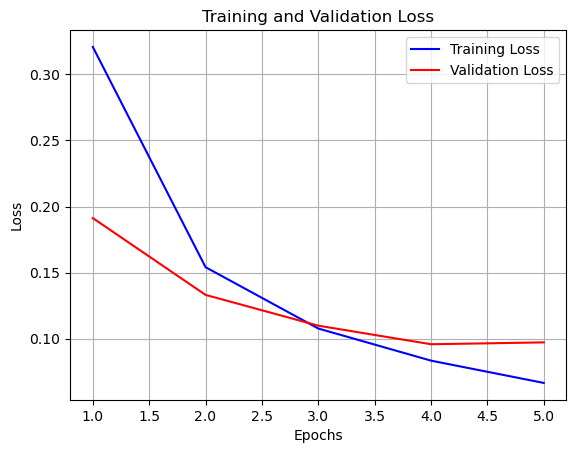

In [14]:
plot_training_loss(base_model_history)

In [15]:
def plot_training_accuracy(history) :
    """
    Plots training and validation accuracy of the baseline model
    
    Input
    history: Training history of the model
    
    Output
    Graph depicting both training and validation accuracy
    
    """
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

    # Get number of epochs
    epochs = range(1, len(acc)+1)

    # Plot training loss in blue
    plt.plot(epochs, acc, 'b', label='Training Acc.')
    # Plot training loss in red
    plt.plot(epochs, val_acc, 'r', label='Validation Acc.')
    
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    _ = plt.show()

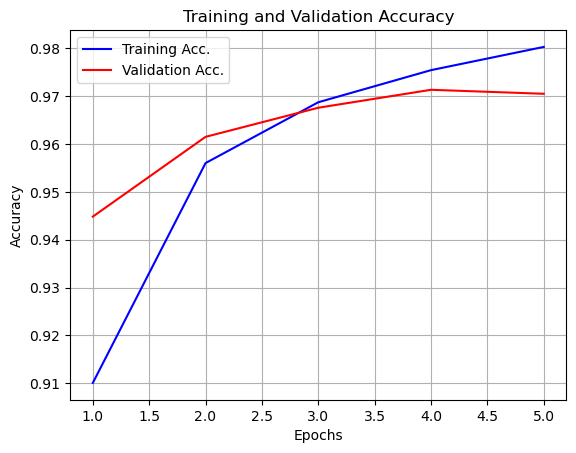

In [16]:
plot_training_accuracy(base_model_history)

In [17]:
# validate base model accuracy against naive baseline
base_model_scores = base_model.evaluate(X_test, y_test_one_hot, verbose=0)[1:]

print('(Accuracy (Validation Set): {:.2f}%) (Majority Class (Naive Baseline): {:.2f}%)'.format(base_model_scores[0] * 100, naive_y_pred * 100))

(Accuracy (Validation Set): 97.12%) (Majority Class (Naive Baseline): 54.20%)


With this we can see that our base model satisfies both,
- achieving better statistical power than the baseline,
- having an accuracy > 10%.

Since these conditions have been satisfied, the earlier hypotheses have been proven that it is possible to predict the output using a given input as I believe there existed a predictive relationship and the data provided by Tensorflow was enough and provided sufficient information to learn the relationship between the inputs and outputs of the MNIST dataset.

## 7. Developing a model that overfits

In order to validate that our model is sufficient, we have to check if it is lying on an ideal border between overfitting and underfitting. This can be done by 3 ways,
1. Add layers,
2. Make the layers bigger,
3. Train for more epochs.

In [18]:
# Train the overfitted model w/ more layers
overfitted_model = Sequential([
                    Flatten(input_shape=(28, 28)),
                    Dense(128, activation='relu'),
                    Dense(64, activation='relu'),
                    Dense(48, activation='relu'),
                    Dense(16, activation='relu'),  
                    Dense(10, activation='softmax')
], name='overfitted_model')

overfitted_model.summary()

Model: "overfitted_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 48)                3120      
                                                                 
 dense_5 (Dense)             (None, 16)                784       
                                                                 
 dense_6 (Dense)             (None, 10)                170       
                                                                 
Total params: 112810 (440.66 KB)
Trainable params:

In [19]:
# Compile the model
overfitted_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model w/ 20 epochs instead of 5
overfitted_model_history = overfitted_model.fit(X_train, y_train,
                 epochs=20, batch_size=64,
                 validation_data=(X_holdout, y_holdout)
                )

# Evaluate the model on the validation set
test_loss, test_acc = overfitted_model.evaluate(X_holdout, y_holdout)
print('Validation Accuracy: {:.2f}%'.format(test_acc * 100))

Epoch 1/20
750/750 [==============================] - 1s 1ms/step - loss: 0.3682 - accuracy: 0.8904 - val_loss: 0.2035 - val_accuracy: 0.9409
Epoch 2/20
750/750 [==============================] - 1s 1ms/step - loss: 0.1394 - accuracy: 0.9581 - val_loss: 0.1210 - val_accuracy: 0.9629
Epoch 3/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0965 - accuracy: 0.9707 - val_loss: 0.1146 - val_accuracy: 0.9646
Epoch 4/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0750 - accuracy: 0.9771 - val_loss: 0.0991 - val_accuracy: 0.9703
Epoch 5/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0588 - accuracy: 0.9820 - val_loss: 0.1127 - val_accuracy: 0.9682
Epoch 6/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0503 - accuracy: 0.9843 - val_loss: 0.0899 - val_accuracy: 0.9737
Epoch 7/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0403 - accuracy: 0.9872 - val_loss: 0.0878 - val_accuracy: 0.9759
Epoch 

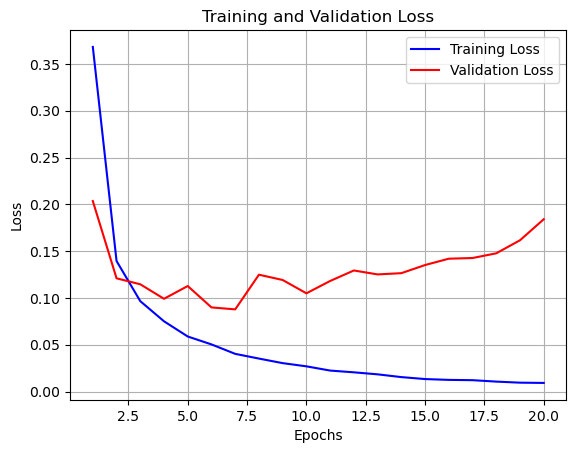

In [20]:
plot_training_loss(overfitted_model_history)

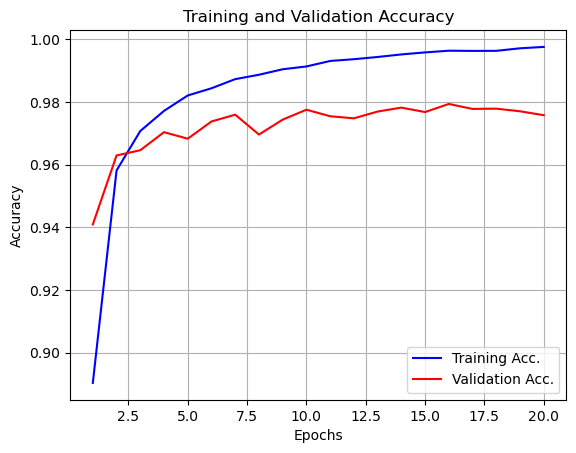

In [21]:
plot_training_accuracy(overfitted_model_history)

Using the previous plotting functions developed, we can see that compared to the base model, this model with added layers and epochs possessed a high training accuracy but low validation accuracy. This is a sign of overfitting as the model is memorizing the training data and is not working well with unseen data.

## 8. Regularizing your model and tuning your hyperparameters

Now that we have a base neural network model and a version of it that overfits, we will try to tune the hyperparameters of this model so that it is optimal. Some solutions for this are to apply,
- dropouts,
- adding/removing layers,
- L1 and L2 Regularization,
- misc. hyperparameter tuning (units /layer, learning rate of optimizer).

These steps will help us develop a satisfactory model configuration, where both <a href='https://www.baeldung.com/cs/training-validation-loss-deep-learning'>validation and training loss</a> curves decrease and stabilize at a specific point.

### 8.1 Reducing Epochs (Model 1)

As the base model had higher validation accuracy with less epochs, we will try to reduce the number of training epochs to the model and see how it affects its accuracy.

A function that returns the training epoch with the lowest validation loss has been created to help us achieve this.

In [22]:
def optimal_epoch(history):
    '''
    Retrieve optimal epoch where validation loss was at its lowest
    
    input:
    model_history: Training history of the model
    
    output:
    epoch where loss was at its lowest
    
    '''
    min_epoch = np.argmin(history['val_loss']) + 1
    print("Minimum validation loss reached in epoch: {}".format(min_epoch))
    return min_epoch

In [23]:
optimal = optimal_epoch(overfitted_model_history.history)

Minimum validation loss reached in epoch: 7


In [24]:
model1 = Sequential([
                    Flatten(input_shape=(28, 28)),
                    Dense(128, activation='relu'),
                    Dense(64, activation='relu'),
                    Dense(48, activation='relu'),
                    Dense(16, activation='relu'),  
                    Dense(10, activation='softmax')
], name='model_1')

model1.summary()

model1.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model w/ optimal 7 epochs instead of 20
model1_history = model1.fit(X_train, y_train,
                 epochs=optimal, batch_size=64,
                 validation_data=(X_holdout, y_holdout)
                )

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               100480    
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 48)                3120      
                                                                 
 dense_10 (Dense)            (None, 16)                784       
                                                                 
 dense_11 (Dense)            (None, 10)                170       
                                                                 
Total params: 112810 (440.66 KB)
Trainable params: 112810 (

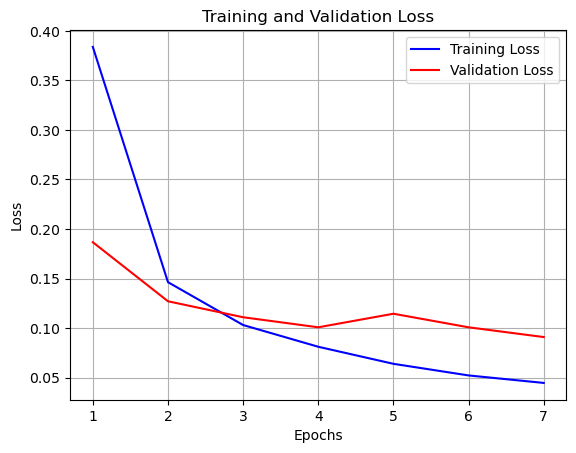

In [25]:
plot_training_loss(model1_history)

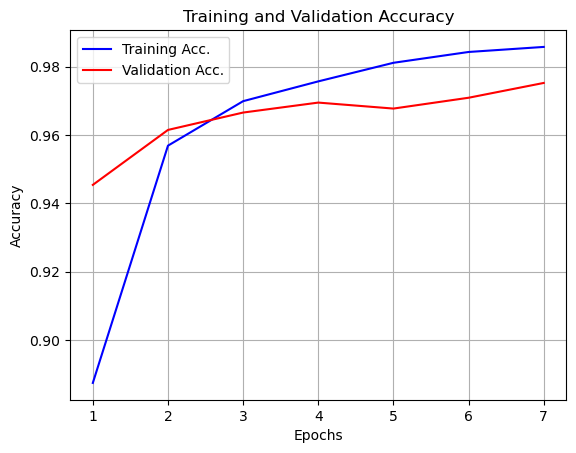

In [26]:
plot_training_accuracy(model1_history)

We can see in Model 1 that when the total number of training epochs were reduced from 20 to 6, overfitting is less prevalent. However, the loss curves have yet to stabilize at a point.

### 8.2 Dropout Regularization (Model 2)

By taking this approach in our next model, certain nodes in each layer will be disregarded during training. This is known as <a href="https://www.analyticsvidhya.com/blog/2022/08/dropout-regularization-in-deep-learning/">Dropout</a> and helps prevent overfitting as it ensures that no units are codependent on one another.

In [27]:
model2 = Sequential([
                    Flatten(input_shape=(28, 28)),
                    Dense(128, activation='relu'),
                    Dense(64, activation='relu'),
                    Dropout(0.5), # Add dropout after first two dense layers
                    Dense(48, activation='relu'),
                    Dense(16, activation='relu'),
                    Dense(10, activation='softmax')
], name='model_2')

model2.summary()

model2.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model2_history = model2.fit(X_train, y_train,
                 epochs=optimal, batch_size=64,
                 validation_data=(X_holdout, y_holdout)
                )

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 48)                3120      
                                                                 
 dense_15 (Dense)            (None, 16)                784       
                                                                 
 dense_16 (Dense)            (None, 10)                170 

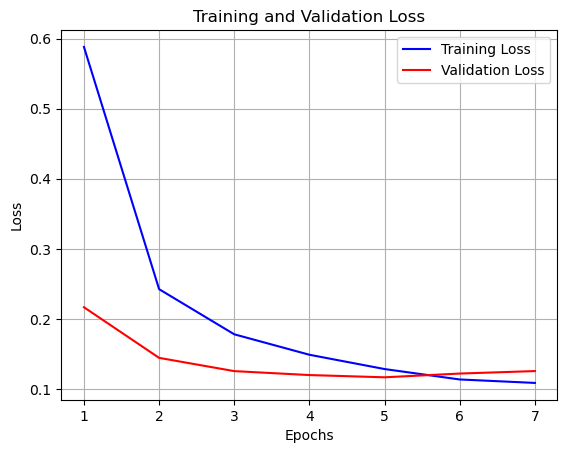

In [28]:
plot_training_loss(model2_history)

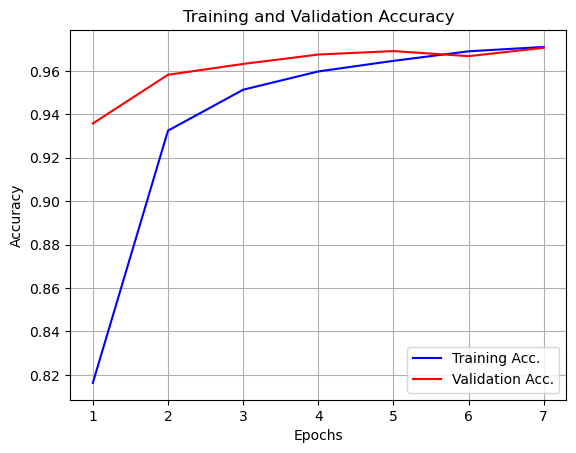

In [29]:
plot_training_accuracy(model2_history)

With the combination of using both the optimal amount of training epochs and adding a single dropout value with a rate of 0.2, we were able to get the curves to touch at the end of the loss graph. 

### 8.3 L2 Regularization (Model 3)

By taking this approach in our next model, a weight decay will be applied where each weights will be shrank to help prevent any single feature from influencing the model's predictions.

In [30]:
model3 = Sequential([
                    Flatten(input_shape=(28, 28)),
                    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
                    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
                    Dropout(0.5), # Add dropout after first two dense layers
                    Dense(48, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
                    Dense(16, activation='relu'),
                    Dense(10, activation='softmax')
], name='model_3')

model3.summary()

model3.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model3_history = model3.fit(X_train, y_train,
                 epochs=optimal, batch_size=64,
                 validation_data=(X_holdout, y_holdout)
                )

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_17 (Dense)            (None, 128)               100480    
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_19 (Dense)            (None, 48)                3120      
                                                                 
 dense_20 (Dense)            (None, 16)                784       
                                                                 
 dense_21 (Dense)            (None, 10)                170 

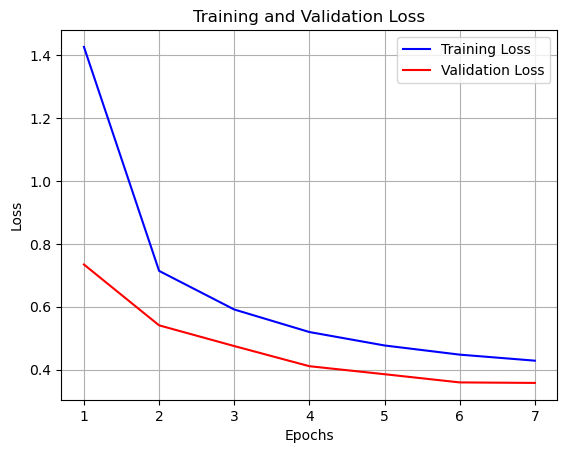

In [31]:
plot_training_loss(model3_history)

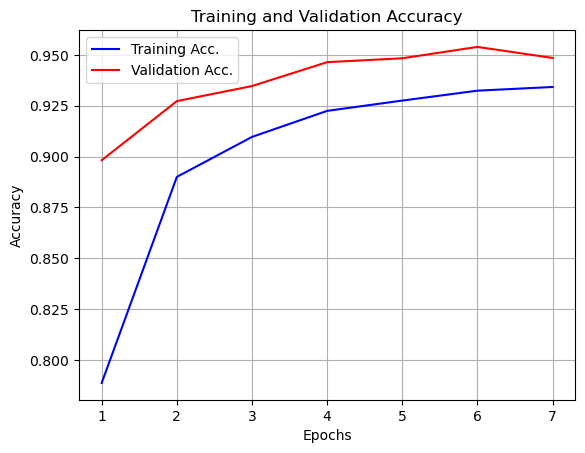

In [32]:
plot_training_accuracy(model3_history)

Adding L2 regularization seems to have widened the curve of the model and as such may not be the best regularization method in our use case.

## 10. Conclusion

In conclusion, I was able to achieve a good fit for my model where both training and validation loss managed to decrease and stabilize at a point.

Tuning the models to find the best parameters took the longest time as it takes very long to run each training epoch when the data was being trained.

While I would have loved to find the exact parameters for the model where both training and validation curves stabilize all the way, with all the different regularization methods that i tried so far the model still overfits easily even with very minor modifications to the model.

Amongst the different models that regularization methods and hyperparameter tuning was done, I found that the model where it had its training epochs reduced from 20 to 7 and dropout rate of 0.5 added to have the best accuracy.

Here are the findings of the base, overfitted and optimal model. 

### 10.1 Base Neural Network Model Results

313/313 [==============================] - 0s 683us/step - loss: 0.0934 - accuracy: 0.9712
Validation Accuracy: 97.12%


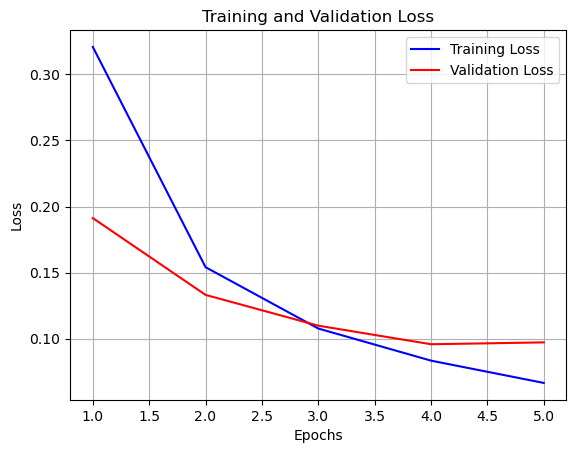

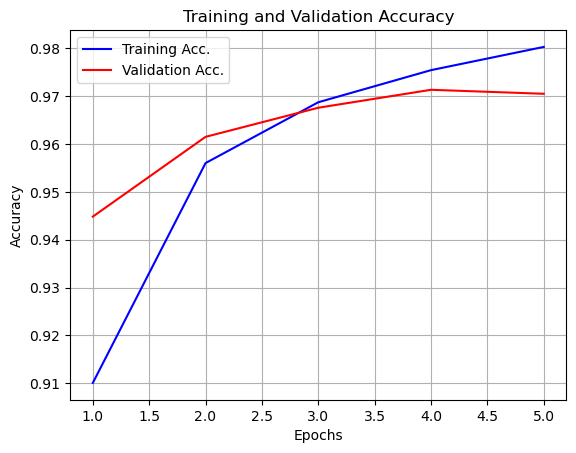

In [33]:
# Baseline
test_loss, test_acc = base_model.evaluate(X_test, y_test_one_hot)
print('Validation Accuracy: {:.2f}%'.format(test_acc * 100))

plot_training_loss(base_model_history)
plot_training_accuracy(base_model_history)

### 10.2 Overfitted Neural Network Model Results

313/313 [==============================] - 0s 723us/step - loss: 0.1791 - accuracy: 0.9750
Validation Accuracy: 97.50%


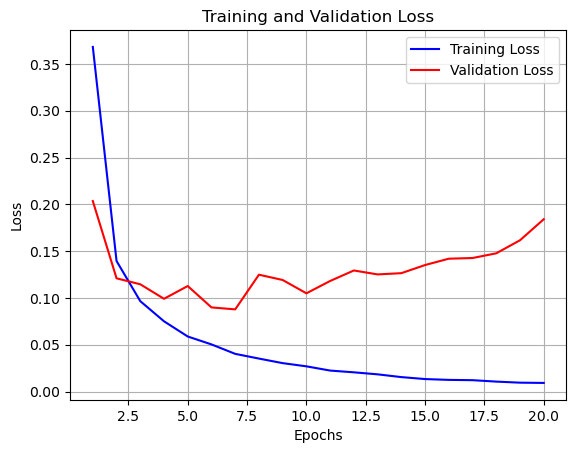

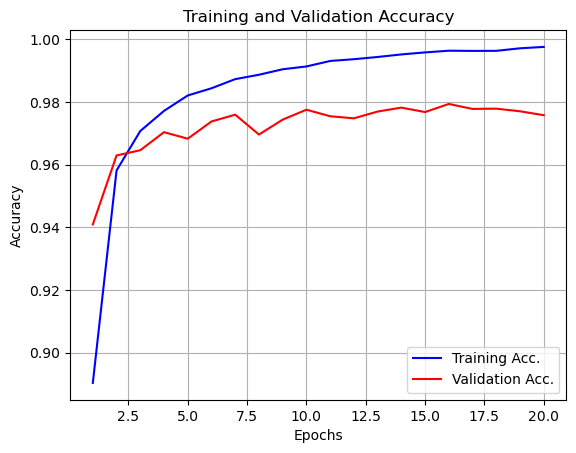

In [34]:
# Baseline
test_loss, test_acc = overfitted_model.evaluate(X_test, y_test_one_hot)
print('Validation Accuracy: {:.2f}%'.format(test_acc * 100))

plot_training_loss(overfitted_model_history)
plot_training_accuracy(overfitted_model_history)

### 10.3 Optimal Neural Network Model Config

- 7 Training Epochs,
- Dropout Rate of 0.5.

313/313 [==============================] - 0s 723us/step - loss: 0.1136 - accuracy: 0.9722
Validation Accuracy: 97.22%


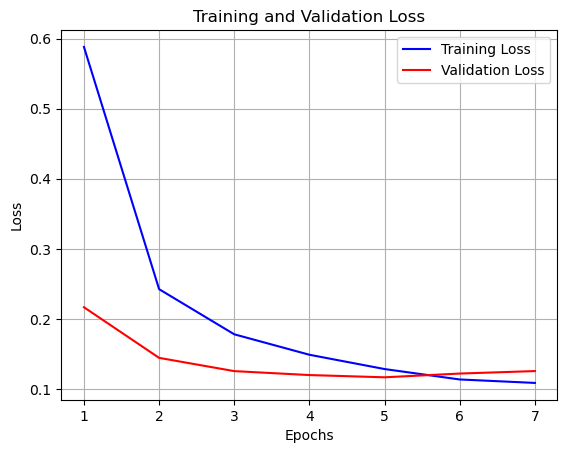

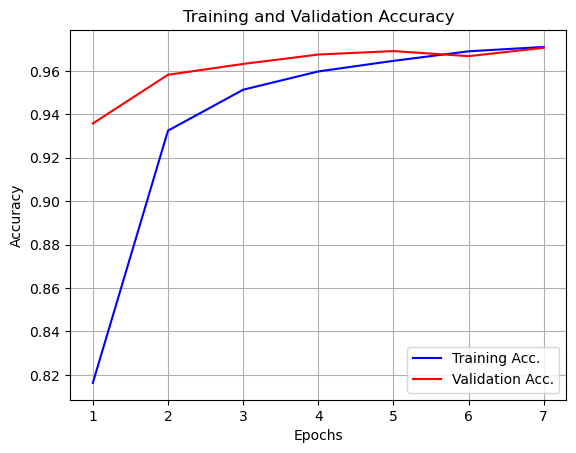

In [35]:
# Baseline
test_loss, test_acc = model2.evaluate(X_test, y_test_one_hot)
print('Validation Accuracy: {:.2f}%'.format(test_acc * 100))

plot_training_loss(model2_history)
plot_training_accuracy(model2_history)

## 11. References

Chollet, F. (2019) Chapter 4. fundamentals of machine learning · Deep Learning with python, · Deep Learning with Python. Available at: https://livebook.manning.com/book/deep-learning-with-python/chapter-4/161 (Accessed: February 2024). 

MNIST  :   tensorflow datasets (no date) TensorFlow. Available at: https://www.tensorflow.org/datasets/catalog/mnist (Accessed: February 2024).

Tf.keras.utils.to_categorical  :   tensorflow V2.15.0.POST1 (no date) TensorFlow. Available at: https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical (Accessed: February 2024). 

baeldung, W. by: (2023) Training and validation loss in Deep Learning, Baeldung on Computer Science. Available at: https://www.baeldung.com/cs/training-validation-loss-deep-learning (Accessed: February 2024).

Marimuthu, P. (2023) Dropout regularization in Deep learning, Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2022/08/dropout-regularization-in-deep-learning/ (Accessed: February 2024).